In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/envs/work/lib/python3.4/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'tsfc', 
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'absth',
            'wgt',
            'planck_wgt_flux']


def pattern_assign(name):
    return ''' 
    parameter .* :: \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [5]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd/LW',
                          'examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band02_wn_340_540',
                          'ng_7',
                          'g_descending',
                          'refPTs_P_1_T_250__P_200_T_250',
                          'ighigh_7',
                          'getabsth_auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_all.7__all.7',
                          'bigsum',
                          'atmpro_mls_debugblayer')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [6]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd/LW',
                          'examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band02_wn_340_540',
                          'ng_7',
                          'g_descending',
                          'refPTs_P_1_T_250__P_200_T_250',
                          'ighigh_7',
                          'getabsth_auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_all.7__all.7',
                          'bigsum',
                          'atmpro_mls_debugblayer')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [7]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = list(range(1, 7 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [8]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [9]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [10]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [11]:
# print some input parameters

with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 340

nband = 200

nv = 200

dv = 0.005

tsfc = 294.0

pressure_reference_1 = 1.

temperature_reference_1 = 250.

pressure_reference_2 = 200.

temperature_reference_2 = 250.

ighigh = 7

ng = 7

data absth(:, 1) /

!     thresholds for reference (P, T) low
!     data absth(:, 2) /

data wgt
     &     /7 * .7/

planck_wgt_flux = 2

include 'mls75.pro'


In [12]:
fig.display_hrefanchor()

In [13]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [14]:
table_dgdgs.display_hrefanchor()

In [15]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [16]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [124]:
s_blayer = 'Planck radiation bias'
display.HTML(climahtml.getHTML_hrefanchor(s_blayer))

In [17]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: flux, cooling rate g-group 1

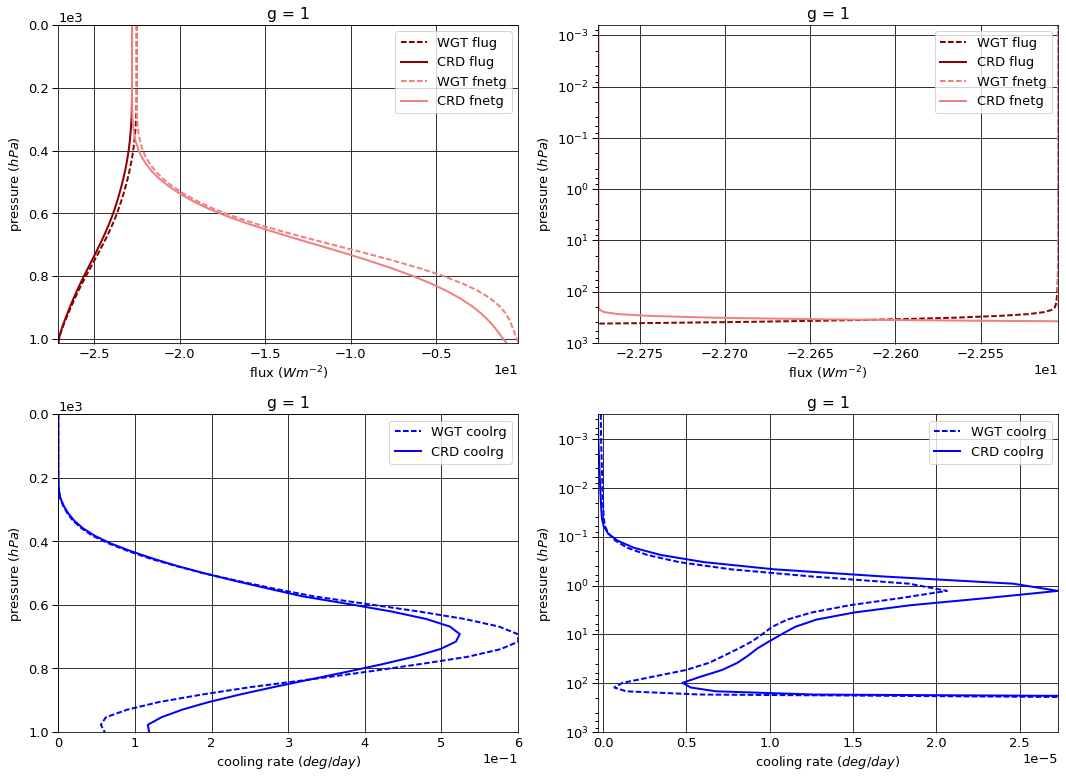

# Figure: flux, cooling rate g-group 2

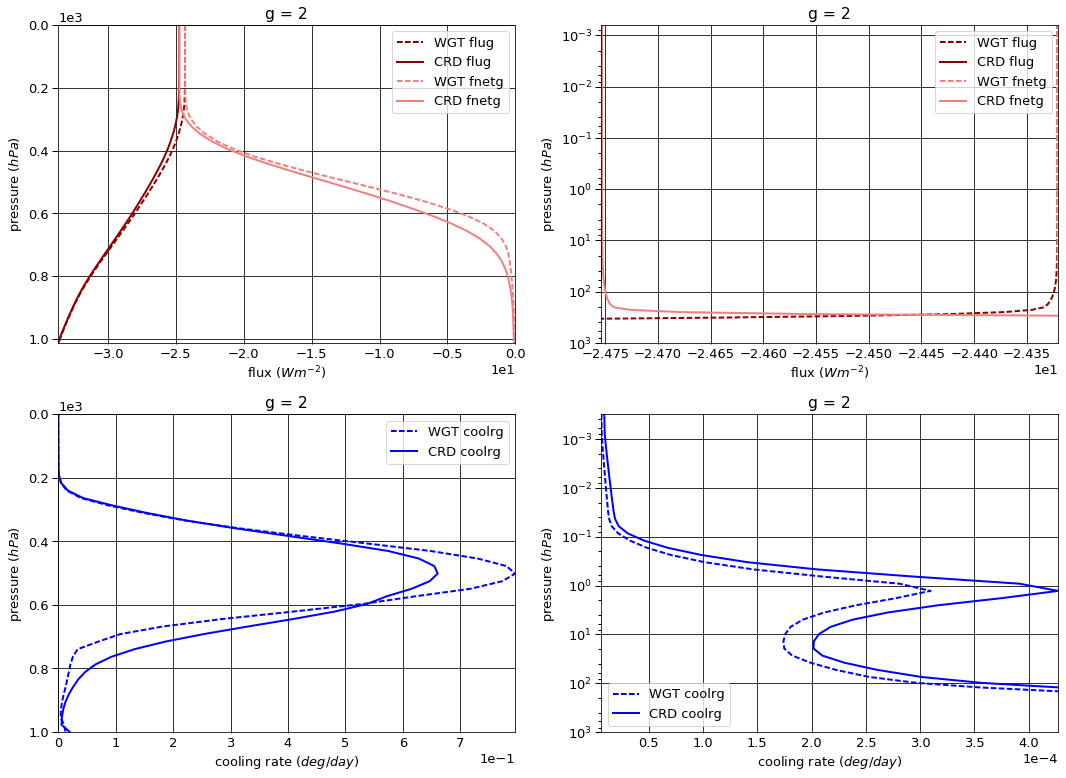

# Figure: flux, cooling rate g-group 3

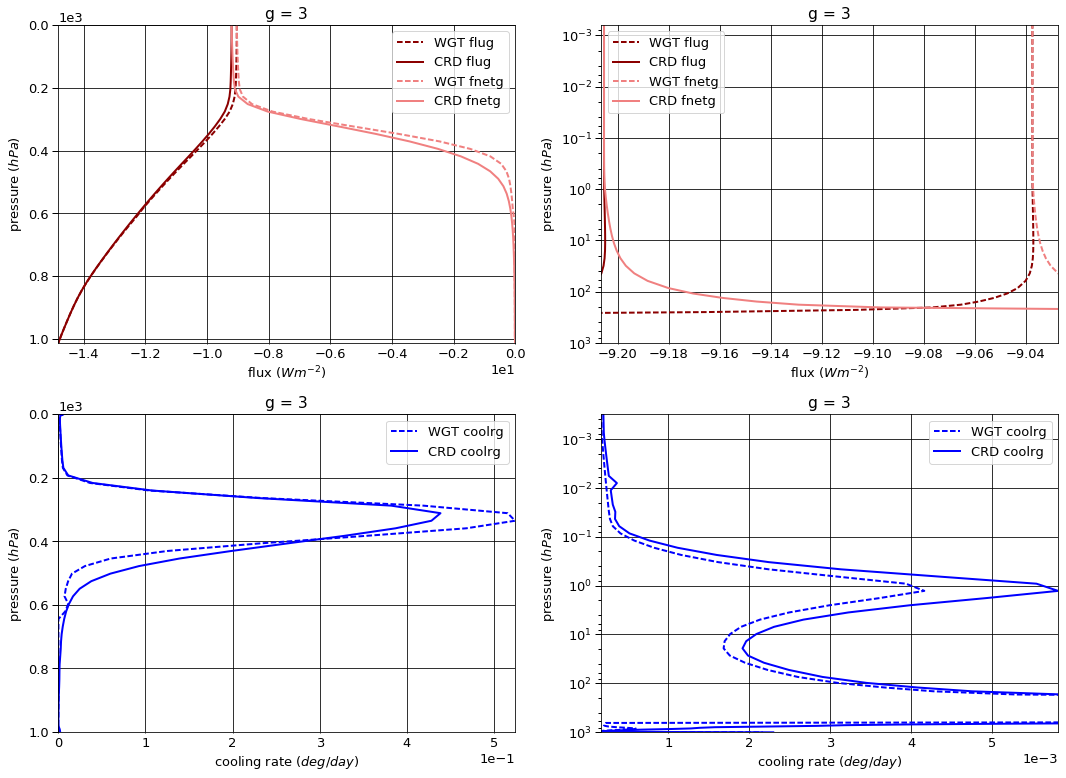

# Figure: flux, cooling rate g-group 4

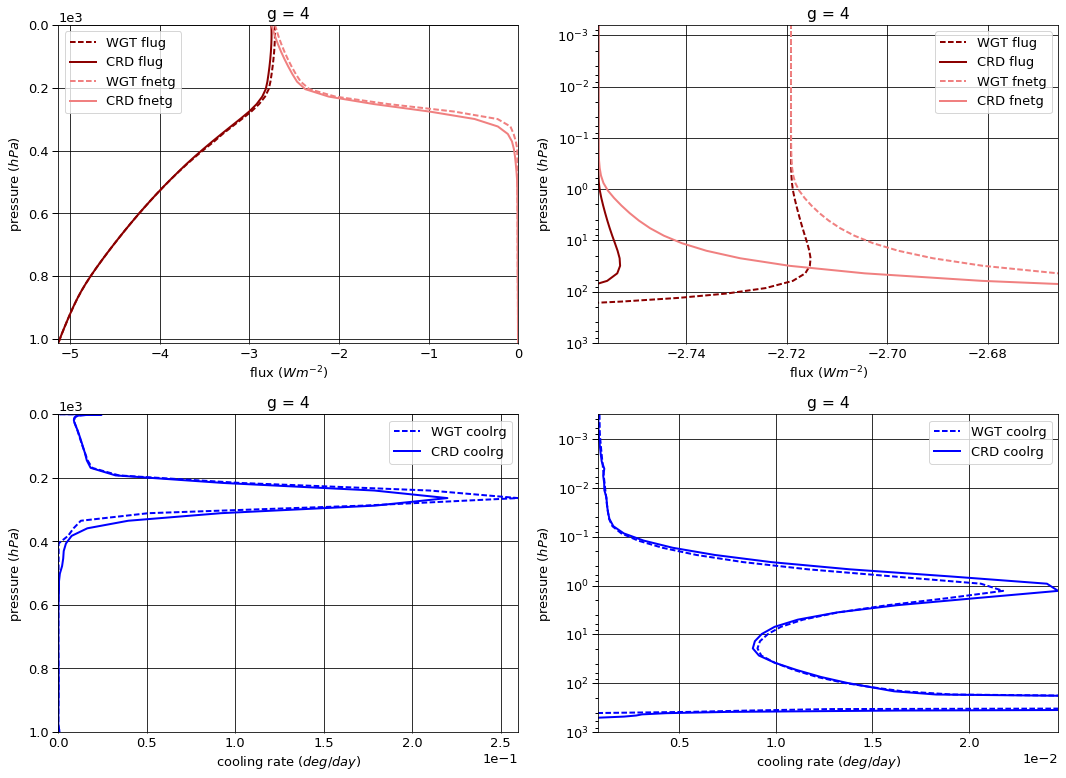

# Figure: flux, cooling rate g-group 5

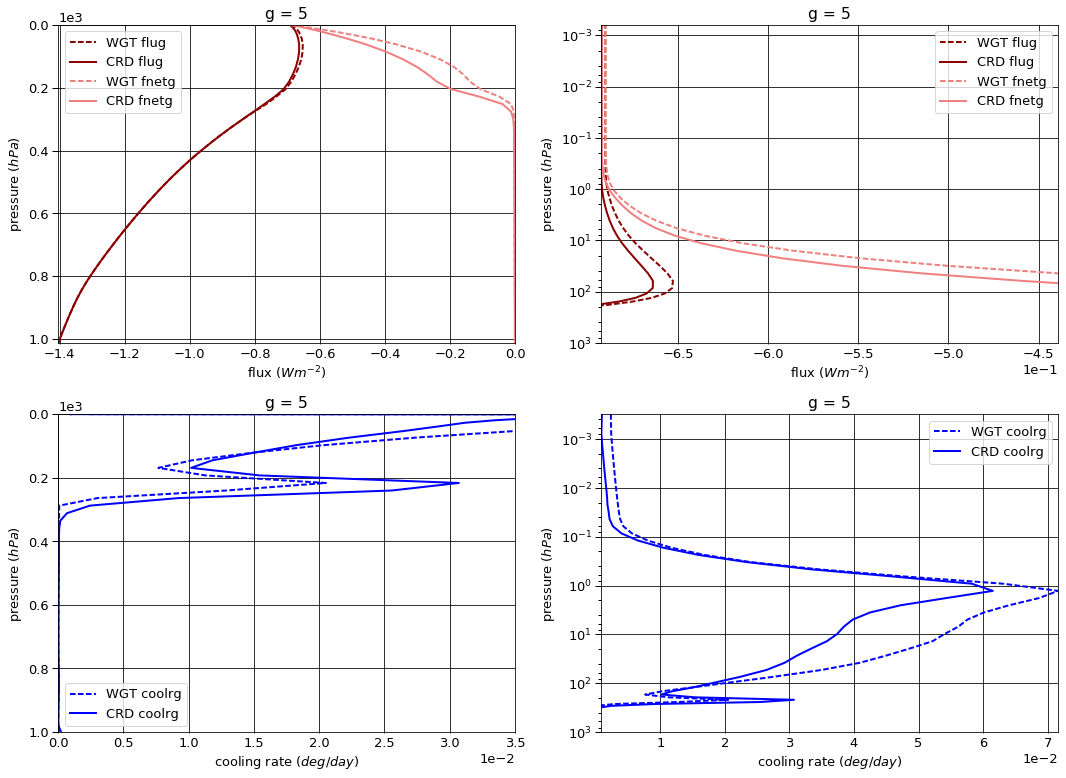

# Figure: flux, cooling rate g-group 6

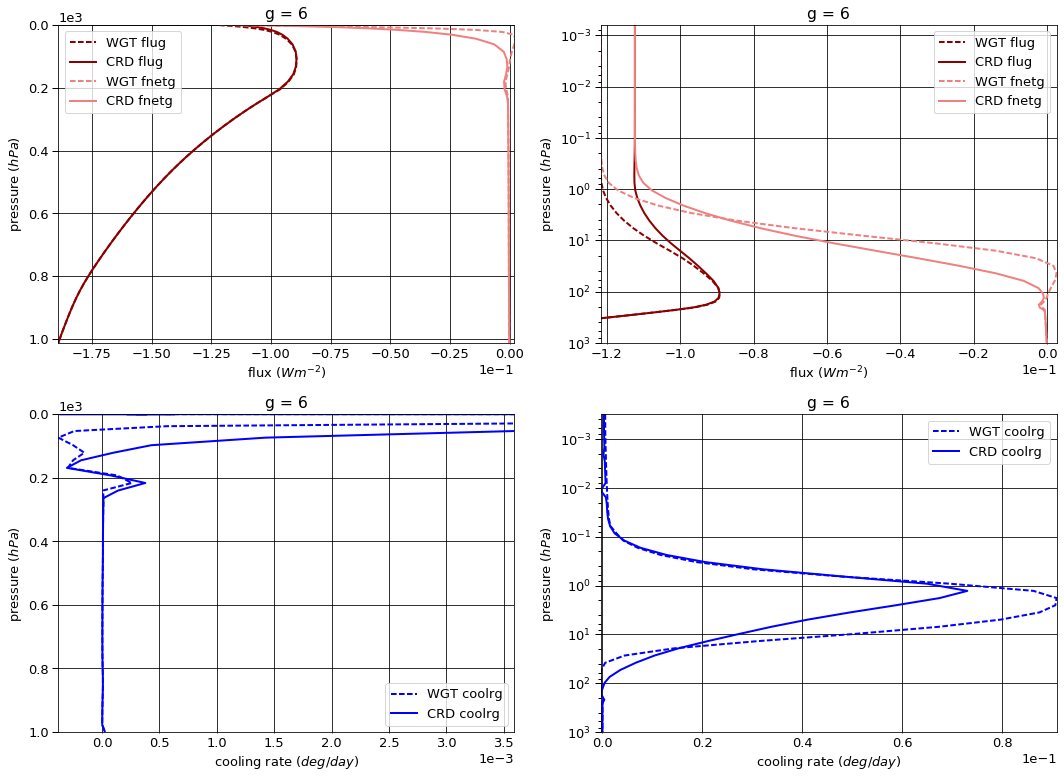

# Figure: flux, cooling rate g-group 7

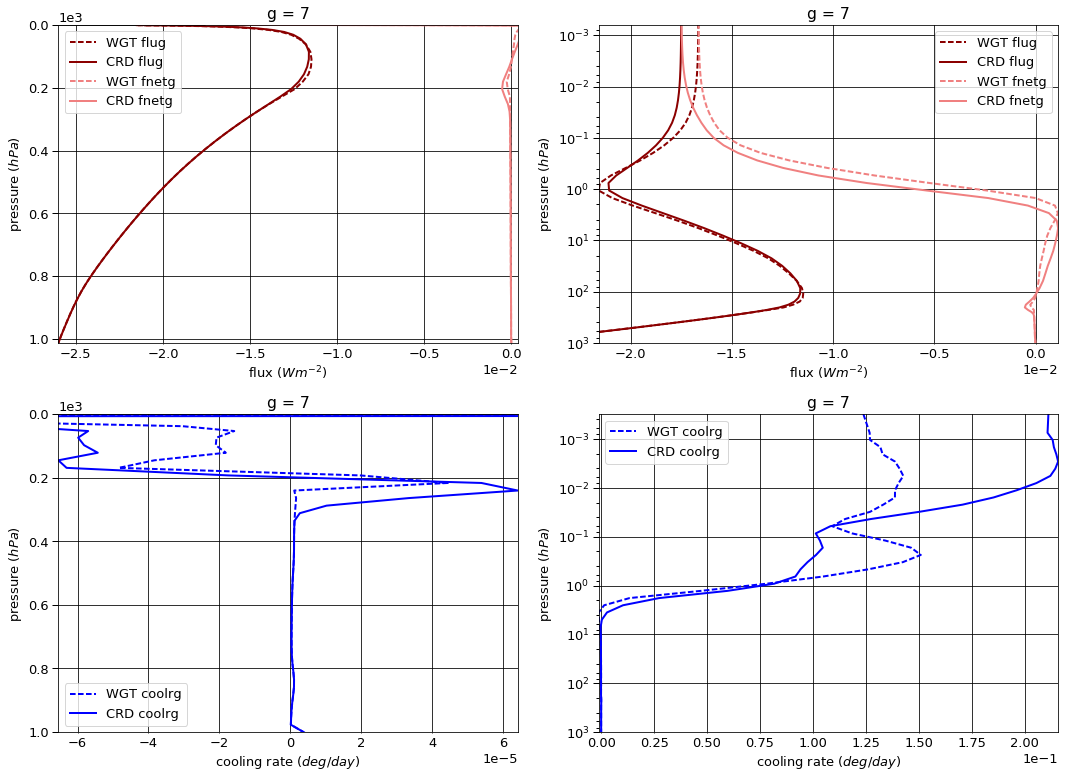

# Figure: flux, cooling rate g-group total

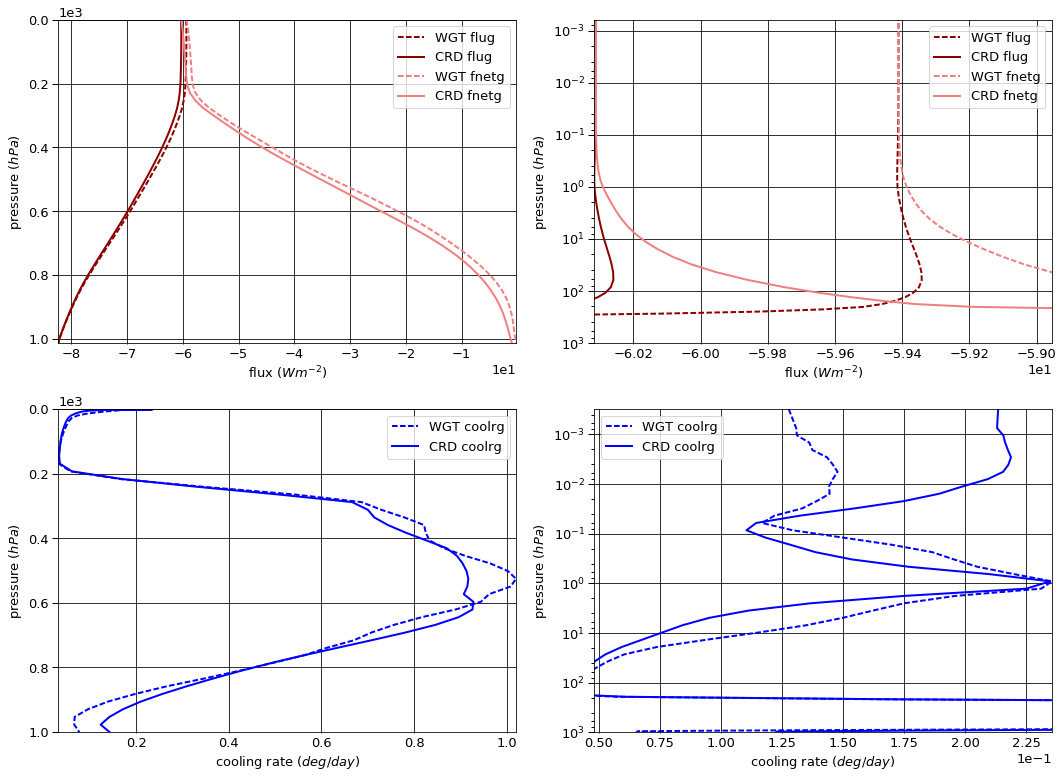

In [18]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [19]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug       fldg      fnetg
g pressure level                                 
1 0.0      1     -22.774528   0.000000 -22.774528
  1013.0   76    -27.081330  26.180419  -0.900912
2 0.0      1     -24.753149   0.000000 -24.753149
  1013.0   76    -33.657019  33.599944  -0.057075
3 0.0      1      -9.205441   0.000000  -9.205441
  1013.0   76    -14.826560  14.820218  -0.006342
4 0.0      1      -2.757486   0.000000  -2.757486
  1013.0   76     -5.131713   5.129655  -0.002058
5 0.0      1      -0.692636   0.000000  -0.692636
  1013.0   76     -1.404111   1.403551  -0.000560
6 0.0      1      -0.112345   0.000000  -0.112345
  1013.0   76     -0.189097   0.189025  -0.000072
7 0.0      1      -0.017498   0.000000  -0.017498
  1013.0   76     -0.025999   0.025988  -0.000011


WGT


flug       fldg      fnetg
g pressure level                                 
1 0.0      1     -22.504499   0.000000 -22.504499
  1013.0   76    -27.081248  26.879179  -0.202069
2 0.0      1     -24.321327   0.000000 -24.321327
  1013.0   76    -33.656526  33.642322  -0.014204
3 0.0      1      -9.037316   0.000000  -9.037316
  1013.0   76    -14.827226  14.821225  -0.006002
4 0.0      1      -2.719169   0.000000  -2.719169
  1013.0   76     -5.131518   5.129461  -0.002058
5 0.0      1      -0.690585   0.000000  -0.690585
  1013.0   76     -1.404165   1.403605  -0.000560
6 0.0      1      -0.121675   0.000000  -0.121675
  1013.0   76     -0.189108   0.189036  -0.000072
7 0.0      1      -0.016648   0.000000  -0.016648
  1013.0   76     -0.026004   0.025993  -0.000011


WGT - CRD


flug      fldg         fnetg
g pressure level                                  
1 0.0      1      0.270029  0.000000  2.700290e-01
  1013.0   76     0.000082  0.698760  6.988429e-01
2 0.0      1      0.431822  0.000000  4.318220e-01
  1013.0   76     0.000493  0.042378  4.287106e-02
3 0.0      1      0.168124  0.000000  1.681242e-01
  1013.0   76    -0.000666  0.001007  3.408307e-04
4 0.0      1      0.038317  0.000000  3.831670e-02
  1013.0   76     0.000194 -0.000194  1.146000e-07
5 0.0      1      0.002051  0.000000  2.051160e-03
  1013.0   76    -0.000054  0.000054 -6.248000e-08
6 0.0      1     -0.009330  0.000000 -9.330430e-03
  1013.0   76    -0.000011  0.000011 -7.076000e-09
7 0.0      1      0.000850  0.000000  8.496820e-04
  1013.0   76    -0.000004  0.000004 -3.370000e-09

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1     -3.026054e-07
  1001.112500 75     1.185733e-01
2 0.000312    1      9.083062e-06
  1001.112500 75     2.078293e-02
3 0.000312    1      1.996687e-04
  1001.112500 75     2.297119e-03
4 0.000312    1      8.284537e-04
  1001.112500 75     7.433583e-04
5 0.000312    1      9.705689e-04
  1001.112500 75     2.023784e-04
6 0.000312    1      3.025897e-04
  1001.112500 75     2.591193e-05
7 0.000312    1      2.112079e-01
  1001.112500 75     3.853895e-06


WGT


coolrg
g pressure    layer              
1 0.000312    1     -1.329062e-07
  1001.112500 75     6.069780e-02
2 0.000312    1      6.401978e-06
  1001.112500 75     1.293940e-02
3 0.000312    1      1.747959e-04
  1001.112500 75     2.167938e-03
4 0.000312    1      8.904298e-04
  1001.112500 75     7.433169e-04
5 0.000312    1      2.355908e-03
  1001.112500 75     2.024009e-04
6 0.000312    1      5.541634e-04
  1001.112500 75     2.591448e-05
7 0.000312    1      1.238494e-01
  1001.112500 75     3.855110e-06


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      1.696992e-07
  1001.112500 75    -5.787548e-02
2 0.000312    1     -2.681084e-06
  1001.112500 75    -7.843522e-03
3 0.000312    1     -2.487272e-05
  1001.112500 75    -1.291808e-04
4 0.000312    1      6.197609e-05
  1001.112500 75    -4.141000e-08
5 0.000312    1      1.385339e-03
  1001.112500 75     2.249000e-08
6 0.000312    1      2.515737e-04
  1001.112500 75     2.552000e-09
7 0.000312    1     -8.735852e-02
  1001.112500 75     1.214900e-09

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-60.313083,0.000000,-60.313083
1013.0,76,-82.315829,81.348801,-0.967029



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-59.411220,0.00000,-59.411220
1013.0,76,-82.315795,82.09082,-0.224974



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,0.901862,0.00000,0.901862
1013.0,76,0.000034,0.74202,0.742055


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.213518
1001.112500,75,0.142629



WGT


,,coolrg
pressure,layer,
0.000312,1,0.127831
1001.112500,75,0.076781



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.085687
1001.112500,75,-0.065848


In [20]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.312550,0.320169
2,0.411675,0.411091
3,0.188975,0.184380
4,0.065825,0.064060
5,0.018100,0.017564
6,0.002550,0.002413
7,0.000325,0.000321


In [21]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,0.000000e+00
2,1.987306e-23
3,2.481695e-22
4,3.099076e-21
5,3.870045e-20
6,4.832811e-19
7,2.044779e-18


In [22]:
def spreadsheet():
    ng = 7
    ighigh = 7
    pref_1, pref_2 = 1, 200
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom.loc[3:ng] / df_abscom_copy.loc[3:ng]
    df_absratio.columns = ['k(ig+1)/k(ig)']

    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    df_pref = pd.DataFrame((pref_1 * (df_dgdgs.index >= ighigh)
                            + pref_2 * (df_dgdgs.index < ighigh)),
                           index=df_dgdgs.index, columns=['pref'])    
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [23]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig+1)/k(ig),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,0.000000e+00,NaN,0.312550,0.320169,0.312550,0.320169,200
2,1.987306e-23,NaN,0.411675,0.411091,0.724225,0.731261,200
3,2.481695e-22,12.487738,0.188975,0.184380,0.913200,0.915641,200
4,3.099076e-21,12.487738,0.065825,0.064060,0.979025,0.979701,200
5,3.870045e-20,12.487738,0.018100,0.017564,0.997125,0.997265,200
6,4.832811e-19,12.487738,0.002550,0.002413,0.999675,0.999679,200
7,2.044779e-18,4.231036,0.000325,0.000321,1.000000,1.000000,1


In [127]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_blayer)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_blayer)))

# Planck radiation bias

CRD uses subroutine irflux(), and from this subroutine we write out Planck radiation for all layers, at some wavenumber $vm$ and at some g-point, $g$:

$$
B_{irflux}(layer, vm, ig)
$$


WGT uses subroutine irf(), and from this subroutine we write out Planck radiation for all layers, at some g-point $g$:

$$
B_{irf}(layer, ig)
$$

We first sum over $vm$ in order to compare the two, and plot them below for all $g$s:


In [119]:
def load_b(source='irflux'):

    if source == 'irflux':
        index_col = list(range(3))
    else:
        index_col = list(range(2))
    
    fpath = os.path.join(crd.rundir, 'b_{}.dat'.format(source))
    
    srs = pd.read_csv(fpath, sep=r'\s+', index_col=index_col).squeeze()

    return xr.DataArray.from_series(srs)



def plt_blayers():
    import matplotlib 
    import matplotlib.pyplot as plt
    
    da_irflux = load_b(source='irflux')
    da_irf = load_b(source='irf')
    
    
    gs = da_irflux.coords['g']

    ncols = 2    
    nrows = int(len(gs) / ncols) + 1


    fig, axs = plt.subplots(nrows=nrows, ncols=ncols,
                        figsize=(12, 6 * nrows))

    axs = axs.flatten()
    for ax, g in zip(axs, gs):
    
        da_irflux.sel(g=g).sum('vm').climaviz.plot(ax=ax,
                                                   index_on_yaxis=True,
                                                   yincrease=False,
                                                   yscale='linear',
                                                   xscale='log',
                                                   label='irflux')
        da_irf.sel(g=g).climaviz.plot(ax=ax,
                                      index_on_yaxis=True,
                                      yincrease=False,
                                      yscale='linear',
                                      xscale='log',
                                      label='irf')
    return fig, axs.reshape((nrows, ncols))

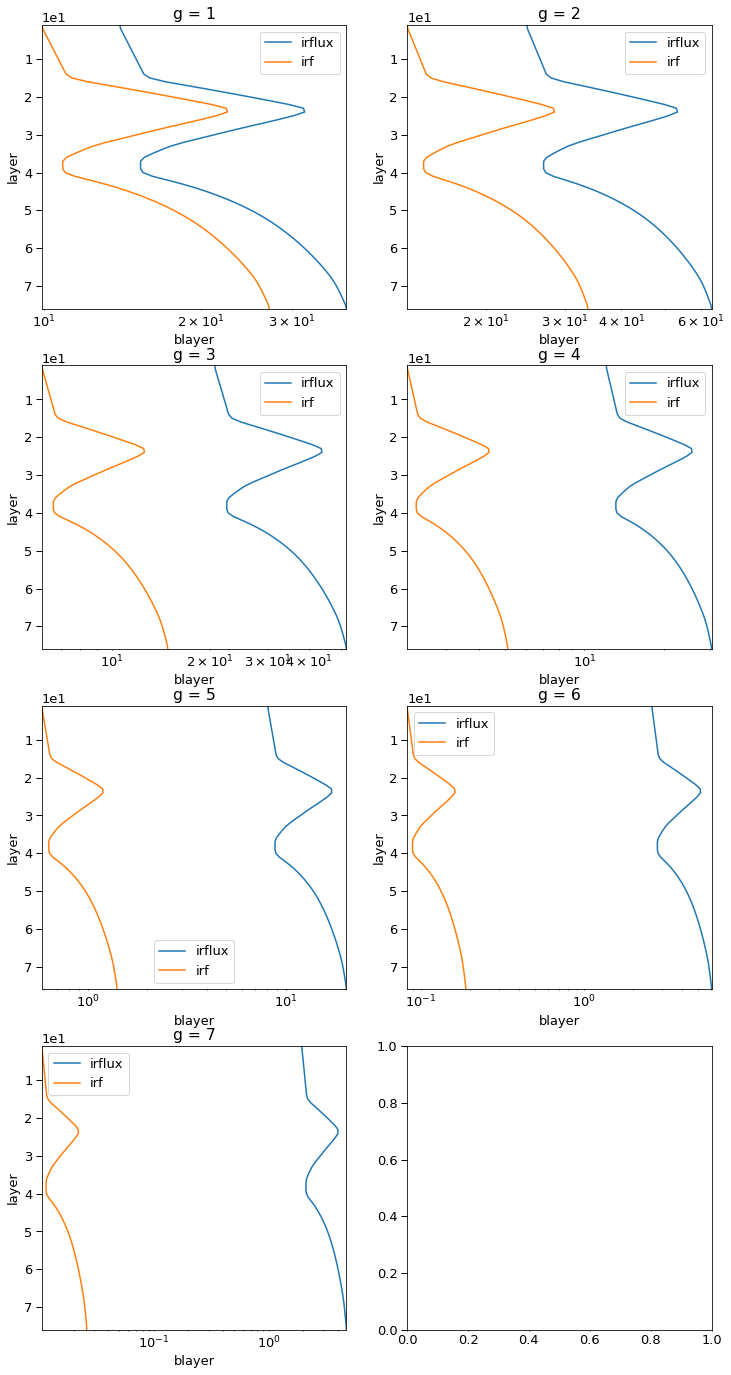

In [120]:
fig, axs = plt_blayers()

The table below shows the ratio:

$$
\frac{\sum_{vm} B_{irflux}(layer, vm, ig)}{ B_{irf}(layer, ig)}
$$ 

for each $layer$ and $g$.

In [121]:
print('irflux / irf')
(da_irflux.sum('vm') / da_irf).to_pandas()

irflux / irf


g,1,2,3,4,5,6,7
layer,,,,,,,
1,1.410544,1.847541,3.371830,5.669829,13.798165,31.466569,184.745264
2,1.410526,1.847699,3.372378,5.670757,13.800418,31.468247,184.739249
3,1.410487,1.848033,3.373539,5.672724,13.805187,31.471799,184.726518
4,1.410445,1.848386,3.374764,5.674799,13.810220,31.475547,184.713078
5,1.410404,1.848737,3.375986,5.676870,13.815241,31.479286,184.699688
6,1.410363,1.849088,3.377204,5.678935,13.820245,31.483012,184.686336
7,1.410322,1.849437,3.378418,5.680993,13.825233,31.486725,184.673030
8,1.410281,1.849785,3.379629,5.683045,13.830204,31.490426,184.659780
9,1.410241,1.850132,3.380835,5.685092,13.835160,31.494115,184.646579


In [129]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')